## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_df.loc[combined_df.duplicated(['Mouse ID','Timepoint'],keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates(['Mouse ID','Timepoint'])
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_regimen = cleaned_df.groupby("Drug Regimen")
mean_sr = grouped_regimen.mean()['Tumor Volume (mm3)']
median_sr = grouped_regimen.median()['Tumor Volume (mm3)']
vars_sr = grouped_regimen.var()['Tumor Volume (mm3)']
std_sr = grouped_regimen.std()['Tumor Volume (mm3)']
sem_sr = grouped_regimen.sem()['Tumor Volume (mm3)']
summary_1 = pd.DataFrame({'Mean':mean_sr, 'Median':median_sr, 'Variance':vars_sr, 'Standard Deviation':std_sr,'SEM':sem_sr})
summary_1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

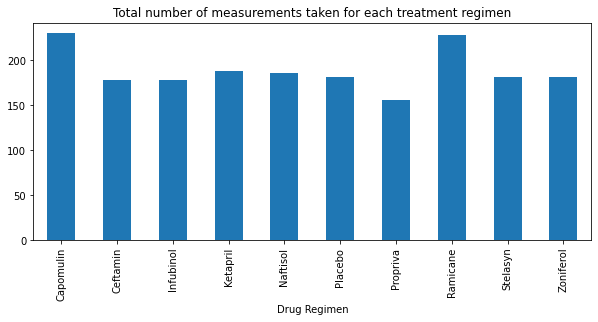

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar1 = grouped_regimen['Timepoint'].count().plot(kind='bar', figsize =(10,4),
    title='Total number of measurements taken for each treatment regimen')
#plt.tight_layout()

Text(0.5, 1.0, 'Total number of timepoints for all mice tested for each drug regimen')

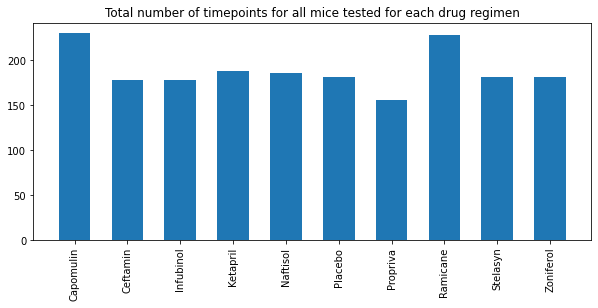

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize =(10,4))
x_axis =grouped_regimen.groups.keys()
tick_loc = np.arange(len(x_axis))
plt.xticks(tick_loc, x_axis, rotation='vertical')
plt.bar(x_axis, grouped_regimen['Timepoint'].count(), width=0.6)
plt.title("Total number of timepoints for all mice tested for each drug regimen")


<AxesSubplot:title={'center':'Gender distribution of mice'}, ylabel='Percentage of Mice of Each Gender'>

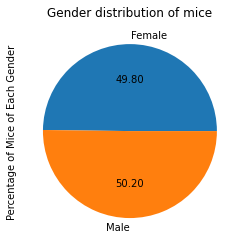

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure().patch.set_facecolor('white')
grouped_by_sex = cleaned_df.groupby("Sex")
count_sex = grouped_by_sex['Mouse ID'].nunique()
count_sex.plot(kind='pie', y=count_sex.index,
    title='Gender distribution of mice',
    ylabel= 'Percentage of Mice of Each Gender',
    autopct = '%.2f',
    )


Text(0, 0.5, 'Percentage of Mice of Each Gender')

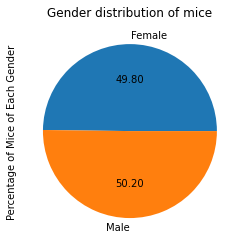

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plt.figure().patch.set_facecolor('white')
plt.pie(count_sex, labels=labels, autopct='%.2f')
plt.title('Gender distribution of mice')
plt.ylabel('Percentage of Mice of Each Gender')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_by_mouse = cleaned_df.groupby('Mouse ID')
max_time_point = grouped_by_mouse['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(max_time_point, cleaned_df, on=['Mouse ID','Timepoint'])
last_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_ls = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = last_tumor_vol.loc[last_tumor_vol['Drug Regimen']==drug,['Mouse ID','Tumor Volume (mm3)']]
    
    # add subset 
    tumor_vol_ls.append(drug_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_data['Tumor Volume (mm3)'].quantile([.25,.75])
    upper_bound = quartiles[.75] + 1.5* (quartiles[.75]-quartiles[.25])
    lower_bound = quartiles[.25] - 1.5* (quartiles[.75]-quartiles[.25])
    outliers = drug_data.loc[
        (drug_data['Tumor Volume (mm3)']<lower_bound) | (drug_data['Tumor Volume (mm3)']>upper_bound)]
    if len(outliers)>0:
        print(f"The outliers for {drug} are: \n{outliers.to_string(index=False)}\n")
    else:
        print(f"There are no outlier for {drug}\n")
    

There are no outlier for Capomulin

There are no outlier for Ramicane

The outliers for Infubinol are: 
Mouse ID  Tumor Volume (mm3)
    c326           36.321346

There are no outlier for Ceftamin



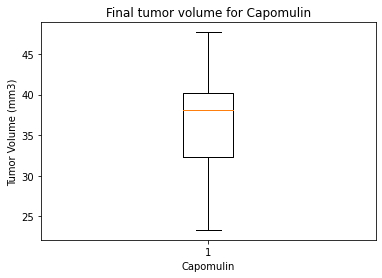

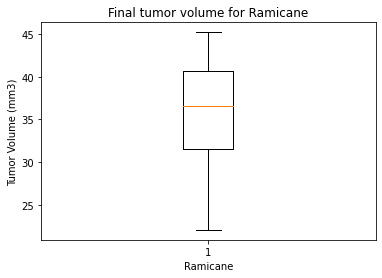

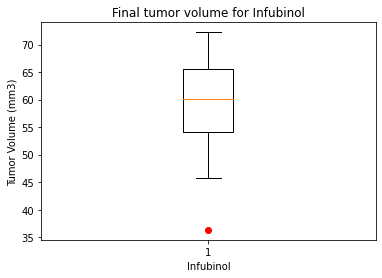

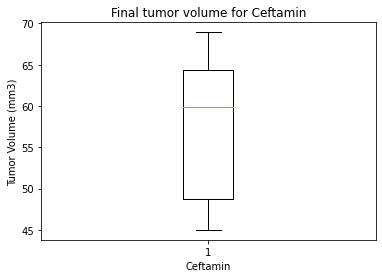

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,sharex=False)
# subplots = [ax1, ax2, ax3, ax4]
for i in range(4):
    plt.boxplot(tumor_vol_ls[i]['Tumor Volume (mm3)'], 
        flierprops={'markeredgecolor':'red','markerfacecolor':'red'})
    plt.title(f"Final tumor volume for {treatments[i]}")
    plt.xlabel(f"{treatments[i]}")
    plt.ylabel("Tumor Volume (mm3)")
    plt.show()


## Line and Scatter Plots

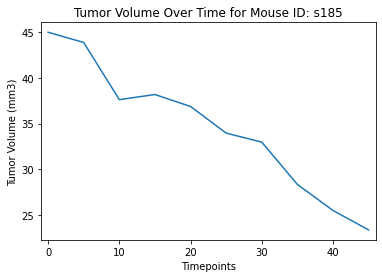

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mice = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin',:].reset_index(drop=True)
mouse_id = capo_mice['Mouse ID'][0]
tumor_vol_over_time = cleaned_df.loc[cleaned_df['Mouse ID']==mouse_id,'Tumor Volume (mm3)']
timepoints = cleaned_df.loc[cleaned_df['Mouse ID']==mouse_id,'Timepoint']
plt.plot(timepoints,tumor_vol_over_time)
plt.title(f"Tumor Volume Over Time for Mouse ID: {mouse_id}")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-1,46)
plt.show()

Text(0, 0.5, 'Mouse Weight (g)')

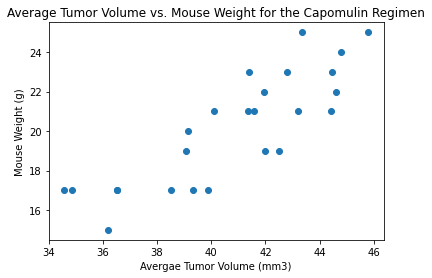

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = capo_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capo_mice.groupby("Mouse ID")['Weight (g)'].max()
plt.scatter(avg_tumor, mouse_weight)
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Avergae Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")

## Correlation and Regression

The correlation between avergae tumor volume and mouse weight is 0.84


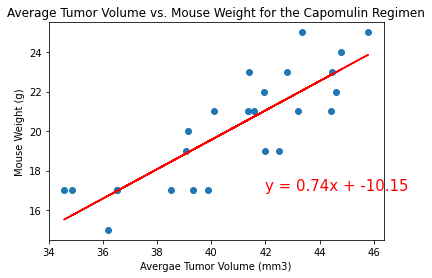

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor, mouse_weight)
print(f"The correlation between avergae tumor volume and mouse weight is {round(correlation[0],2)}")

x_values = avg_tumor
y_values = mouse_weight
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_tumor, mouse_weight)
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Avergae Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42, 17),fontsize=15,color="red")
plt.show()

# Observations
* From the upper and lower bound we calculated for the final tumor volume of all mice treated by four drug regimens, all numbers lie in a reasonable range except for one mouse sample. This shows that the four treatments are all able to give a consistent outcome.
* We have plotted the tumor volume of the mouse s185 under the treatment of Capomulin. We see that the tumor volume was reduced quite noticeably over time (around a 50% decrease), and we may conclude that Capomulin treatment is effective.
* From the correlation coefficient (being at 0.84) and the linear regression model, we can see that there is a fairly strong positive correlation between avergae tumor volume and mouse weight for the Capomulin regimen. It means that the more a mouse weigh, likely the more tumor it will have.